In [95]:
pip install matplotlib


     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/159.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/159.4 kB 445.2 kB/s eta 0:00:01
     ------------------------------------ - 153.6/159.4 kB 1.8 MB/s eta 0:00:01
     ------------------------------------ - 153.6/159.4 kB 1.8 MB/s eta 0:00:01
     ------------------------------------ 159.4/159.4 kB 956.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.6 MB 14.1 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.6 MB 10.6 MB/s eta 0:00:01
   -------- ------------------------------- 1.5/7.6 MB 12.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.6 MB 11.7 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.6 MB 12.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.6 MB 13.4 MB/s eta 0:00:01
 

In [96]:
import tmdbsimple as tmdb
import pandas as pd
import matplotlib.pyplot as plt
tmdb.API_KEY = '77b3e44f983ea9bfc6eae8182d00e4c9'

In [44]:
def getActorId(name):
    id = -1
    try:
        search = tmdb.Search()
        search_results = search.person(query=name)
        id = search.results[0]['id']
    except:
        print('error')
    return id

In [46]:
getActorId('John Krasinski')

17697

In [68]:
def getMovieCredits(actorId):
    person = tmdb.People(17697)
    return person.movie_credits()['cast']

In [93]:
movieCredits = getMovieCredits(17697)

In [91]:
def toDataframe(movieCredits):
    movie_credits_df = pd.DataFrame(movie_credits)
    return movie_credits_df.loc[:,('title','id','release_date', 'popularity','vote_average')].sort_values('release_date')

In [98]:
movie_data = toDataframe(movieCredits)

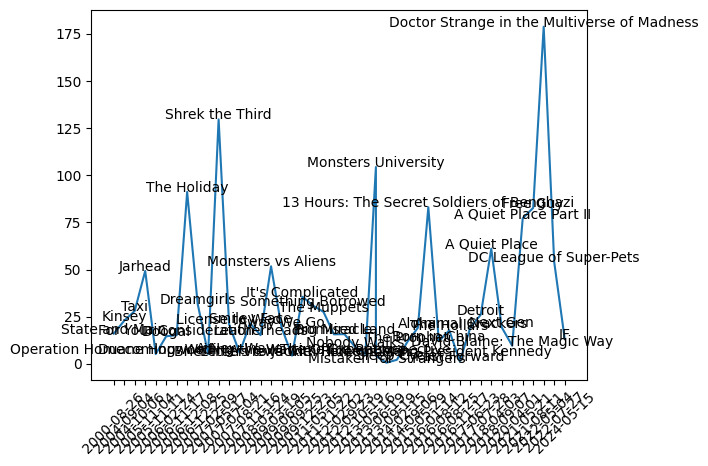

In [107]:
plt.plot(movie_data['release_date'], movie_data['popularity'])
plt.xticks(rotation=45)
for (i, j,k) in zip (movie_data['release_date'], movie_data['popularity'], movie_data['title']):
    plt.text(i, j, f'{k}', ha='center')
plt.show()